In [1]:
import pandas as pd

In [2]:
true = pd.read_csv("trueNews.csv")
true

,Date Posted,Link,Text,Region,Username,Publisher,Label
0,2/11/20,https://twitter.com/the_hindu/status/122725962...,Just in: Novel coronavirus named 'Covid-19': U...,India,the_hindu,The Hindu,1
1,2/12/20,https://twitter.com/ndtv/status/12274908434742...,WHO officially names #coronavirus as Covid-19....,India,ndtv,NDTV,1
2,2/12/20,https://twitter.com/the_hindu/status/122744471...,"The #UN #health agency announced that ""COVID-1...",India,the_hindu,The Hindu,1
3,2/14/20,https://twitter.com/IndiaToday/status/12282764...,The Indian Embassy in Tokyo has said that one ...,India,indiatoday,IndiaToday,1
4,2/15/20,https://twitter.com/the_hindu/status/122854247...,Ground Zero | How Kerala used its experience i...,India,the_hindu,The Hindu,1
...,...,...,...,...,...,...,...
3788,6/30/20,https://twitter.com/ReutersUK/status/127789851...,Global COVID-19 prevention trial of hydroxychl...,Europe,reutersuk,Reuters UK,1
3789,6/30/20,https://twitter.com/ReutersUK/status/127798902...,Bavaria's free COVID-19 test for all splits Ge...,Europe,reutersuk,Reuters UK,1
3790,6/30/20,https://twitter.com/ReutersUK/status/127787577...,Britain locks down city of Leicester after COV...,Europe,reutersuk,Reuters UK,1
3791,6/30/20,https://twitter.com/ReutersUK/status/127778649...,UK imposes lockdown on city of Leicester to cu...,Europe,reutersuk,Reuters UK,1


In [3]:
true['Publisher'].value_counts().plot(kind='bar')

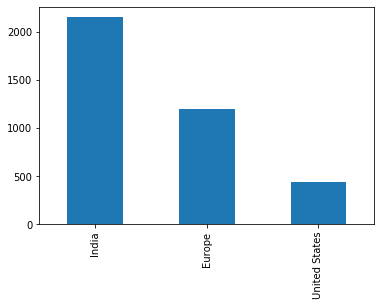

In [4]:
true['Region'].value_counts().plot(kind='bar')

In [5]:
true2 = true.drop(['Date Posted','Link','Region','Username','Publisher'], axis=1)
true2

,Text,Label
0,Just in: Novel coronavirus named 'Covid-19': U...,1
1,WHO officially names #coronavirus as Covid-19....,1
2,"The #UN #health agency announced that ""COVID-1...",1
3,The Indian Embassy in Tokyo has said that one ...,1
4,Ground Zero | How Kerala used its experience i...,1
...,...,...
3788,Global COVID-19 prevention trial of hydroxychl...,1
3789,Bavaria's free COVID-19 test for all splits Ge...,1
3790,Britain locks down city of Leicester after COV...,1
3791,UK imposes lockdown on city of Leicester to cu...,1


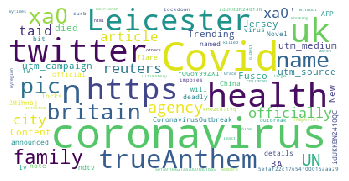

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = true['Text'].values 

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
fake = pd.read_csv("fakeNews.csv")
fake.head()

,Date Posted,Link,Text,Region,Country,Explanation,Origin,Origin_URL,Fact_checked_by,Poynter_Label,Binary Label
0,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,Tencent revealed the real number of deaths.\t\t,Europe,France,The screenshot is questionable.,Twitter,https://www.liberation.fr/checknews/2020/02/07...,CheckNews,Misleading,0
1,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,Taking chlorine dioxide helps fight coronavir...,Europe,Germany,Chlorine dioxide does guard against the coron...,Website,https://correctiv.org/faktencheck/medizin-und-...,Correctiv,FALSE,0
2,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,This video shows workmen uncovering a bat-inf...,India,India,A video shows bats nesting in the roof; howev...,Facebook,https://factcheck.afp.com/video-shows-workmen-...,AFP,MISLEADING,0
3,2/7/20,https://www.poynter.org/?ifcn_misinformation=t...,The Asterix comic books and The Simpsons pred...,India,India,Coronavirus has been around since the 1960s. ...,Twitter,https://www.boomlive.in/health/did-the-simpson...,BOOM FactCheck,Misleading,0
4,2/7/20,https://www.poynter.org/?ifcn_misinformation=c...,Chinese President Xi Jinping visited a mosque...,India,India,Chinese President Xi Jinping's visit to the m...,Facebook,http://newsmobile.in/articles/2020/02/07/chine...,NewsMobile,FALSE,0


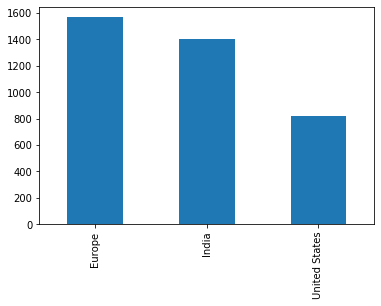

In [9]:
fake['Region'].value_counts().plot(kind='bar')

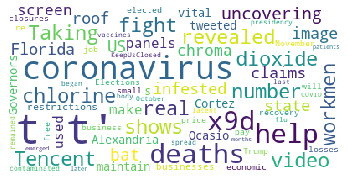

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = fake['Text'].values 

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
fake1 = fake.drop(['Date Posted','Link','Region','Country','Explanation','Origin_URL','Origin','Fact_checked_by','Poynter_Label'], axis=1)
fake2 = fake1.rename(columns={'Binary Label':'Label'})

In [21]:
df = pd.concat([true2, fake2])
df.reset_index(inplace=True)
df = df.drop(['index'], axis =1)
df

,Text,Label
0,Just in: Novel coronavirus named 'Covid-19': U...,1
1,WHO officially names #coronavirus as Covid-19....,1
2,"The #UN #health agency announced that ""COVID-1...",1
3,The Indian Embassy in Tokyo has said that one ...,1
4,Ground Zero | How Kerala used its experience i...,1
...,...,...
7583,Bill Gates said that the COVID-19 vaccine wil...,0
7584,COVID-19 vaccine candidates will insert micro...,0
7585,An image claims that chroma screen panels are...,0
7586,"Alexandria Ocasio-Cortez tweeted, ""It's vital...",0


In [22]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

In [23]:
import string

def remove_punctuations(Text):
    for punctuation in string.punctuation:
        Text = Text.replace(punctuation, '')
    return Text

df['Text'] = df['Text'].apply(remove_punctuations)
df

,Text,Label
0,Just in Novel coronavirus named Covid19 UN hea...,1
1,WHO officially names coronavirus as Covid19\n ...,1
2,The UN health agency announced that COVID19 wi...,1
3,The Indian Embassy in Tokyo has said that one ...,1
4,Ground Zero How Kerala used its experience in...,1
...,...,...
7583,Bill Gates said that the COVID19 vaccine will...,0
7584,COVID19 vaccine candidates will insert microc...,0
7585,An image claims that chroma screen panels are...,0
7586,Alexandria OcasioCortez tweeted Its vital tha...,0


In [24]:
df["Text"] = df["Text"].str.lower()
df

,Text,Label
0,just in novel coronavirus named covid19 un hea...,1
1,who officially names coronavirus as covid19\n ...,1
2,the un health agency announced that covid19 wi...,1
3,the indian embassy in tokyo has said that one ...,1
4,ground zero how kerala used its experience in...,1
...,...,...
7583,bill gates said that the covid19 vaccine will...,0
7584,covid19 vaccine candidates will insert microc...,0
7585,an image claims that chroma screen panels are...,0
7586,alexandria ocasiocortez tweeted its vital tha...,0


In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

porter = PorterStemmer()

corpus = []
for i in range(0, len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    text = text.lower()
    text = text.split()
    
    text = [porter.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)


In [26]:
print(porter.stem("panels"))
print(porter.stem("coronavirus"))

panel
coronaviru


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1))

In [28]:
X = tfidf.fit_transform(corpus)
y = df['Label']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import roc_auc_score

In [31]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

MNB.fit(X_train, y_train)

pred = MNB.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)
print("accuracy  :", accuracy)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC   :",  roc)

error_rate = 1 - accuracy
print("Error rate:",  roc)

from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print("/n")
print(report)

accuracy  : 0.9268774703557312
ROC-AUC   : 0.9262059910523246
Error rate: 0.9262059910523246
/n
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       776
           1       0.95      0.90      0.92       742

    accuracy                           0.93      1518
   macro avg       0.93      0.93      0.93      1518
weighted avg       0.93      0.93      0.93      1518



In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train, y_train)

pred = KNN.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:", score)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC :", roc)

from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print("/n")
print(report)

accuracy: 0.7490118577075099
ROC-AUC : 0.74358622558146
/n
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       776
           1       0.97      0.50      0.66       742

    accuracy                           0.75      1518
   macro avg       0.82      0.74      0.73      1518
weighted avg       0.82      0.75      0.73      1518



In [33]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()

decisionTree.fit(X_train, y_train)

pred = decisionTree.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:", score)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC :",  roc)

from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print("/n")
print(report)

accuracy: 0.9354413702239789
ROC-AUC : 0.9354089671270182
/n
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       776
           1       0.93      0.93      0.93       742

    accuracy                           0.94      1518
   macro avg       0.94      0.94      0.94      1518
weighted avg       0.94      0.94      0.94      1518



In [34]:
from sklearn.svm import SVC 

svc = SVC()  
svc.fit(X_train, y_train)

pred = svc.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:", score)

roc = roc_auc_score(y_test, pred)
print("ROC-AUC :", roc)

from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print("/n")
print(report)

accuracy: 0.9512516469038208
ROC-AUC : 0.9516995720676912
/n
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       776
           1       0.93      0.97      0.95       742

    accuracy                           0.95      1518
   macro avg       0.95      0.95      0.95      1518
weighted avg       0.95      0.95      0.95      1518



In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -.5])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

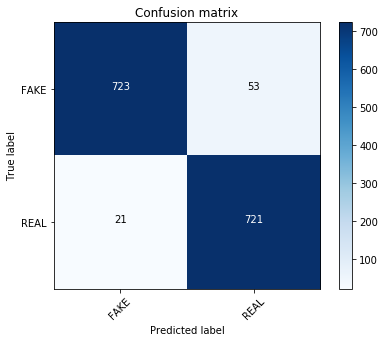

In [36]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [37]:
import pickle

In [38]:
pickle.dump(svc, open('model.pkl', 'wb'))

In [39]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

In [40]:
joblib_model = pickle.load(open('model.pkl', 'rb'))

In [41]:
joblib_vect = pickle.load(open('tfidf.pkl', 'rb'))

In [42]:
val_pkl = joblib_vect.transform([text]).toarray()

In [44]:
joblib_model.predict(val_pkl)

array([0], dtype=int64)